Google

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('google.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
1,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
3,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
4,2004-08-26,2.626376,2.701451,2.619119,2.700450,2.700450,141897960
...,...,...,...,...,...,...,...
4512,2022-07-25,108.410004,109.870003,106.300003,107.510002,107.510002,34690900
4513,2022-07-26,106.599998,107.199997,104.070000,105.019997,105.019997,47991000
4514,2022-07-27,109.260002,113.910004,108.010002,113.059998,113.059998,59858500
4515,2022-07-28,112.370003,114.339996,111.459999,114.220001,114.220001,32816600


<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

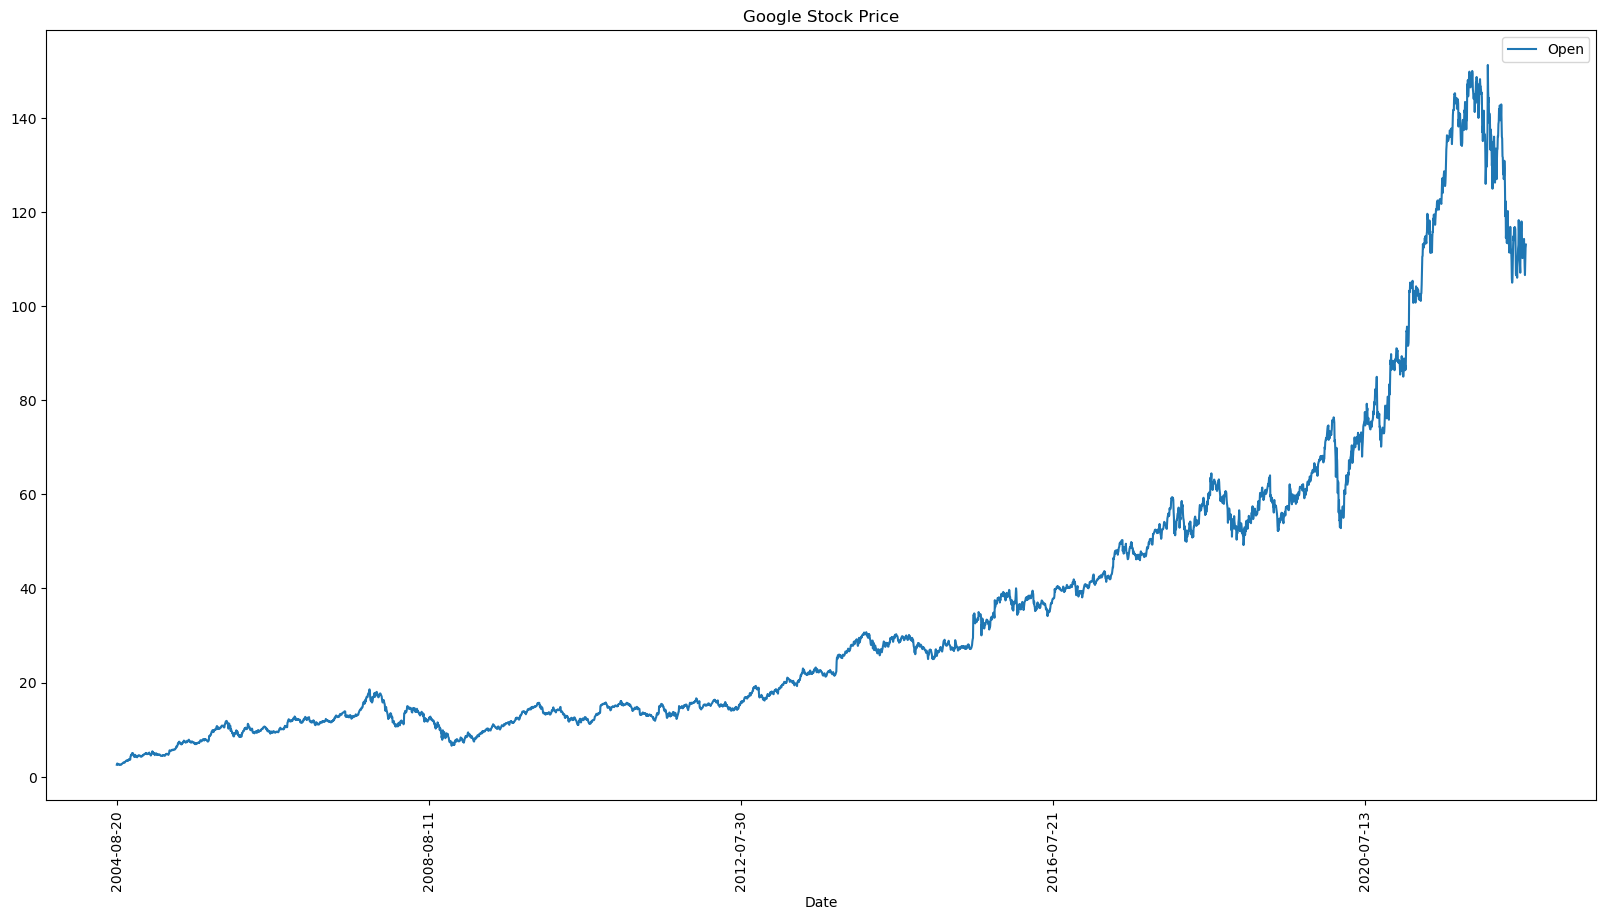

In [4]:
df.plot(x='Date', y='Open', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')

<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

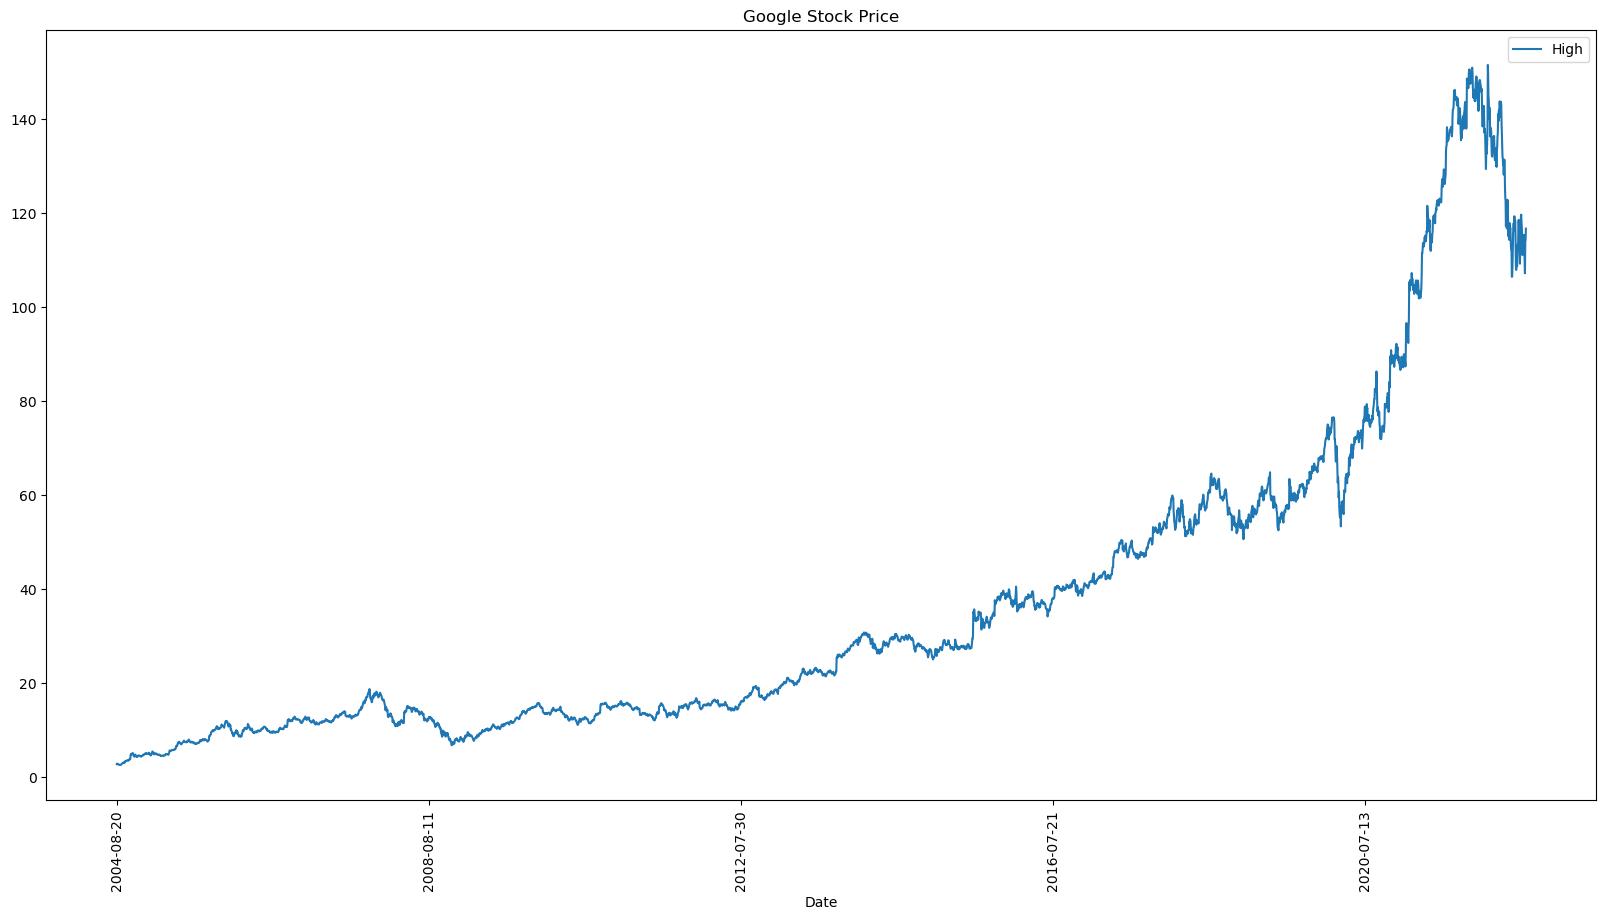

In [5]:
df.plot(x='Date', y='High', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')

<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

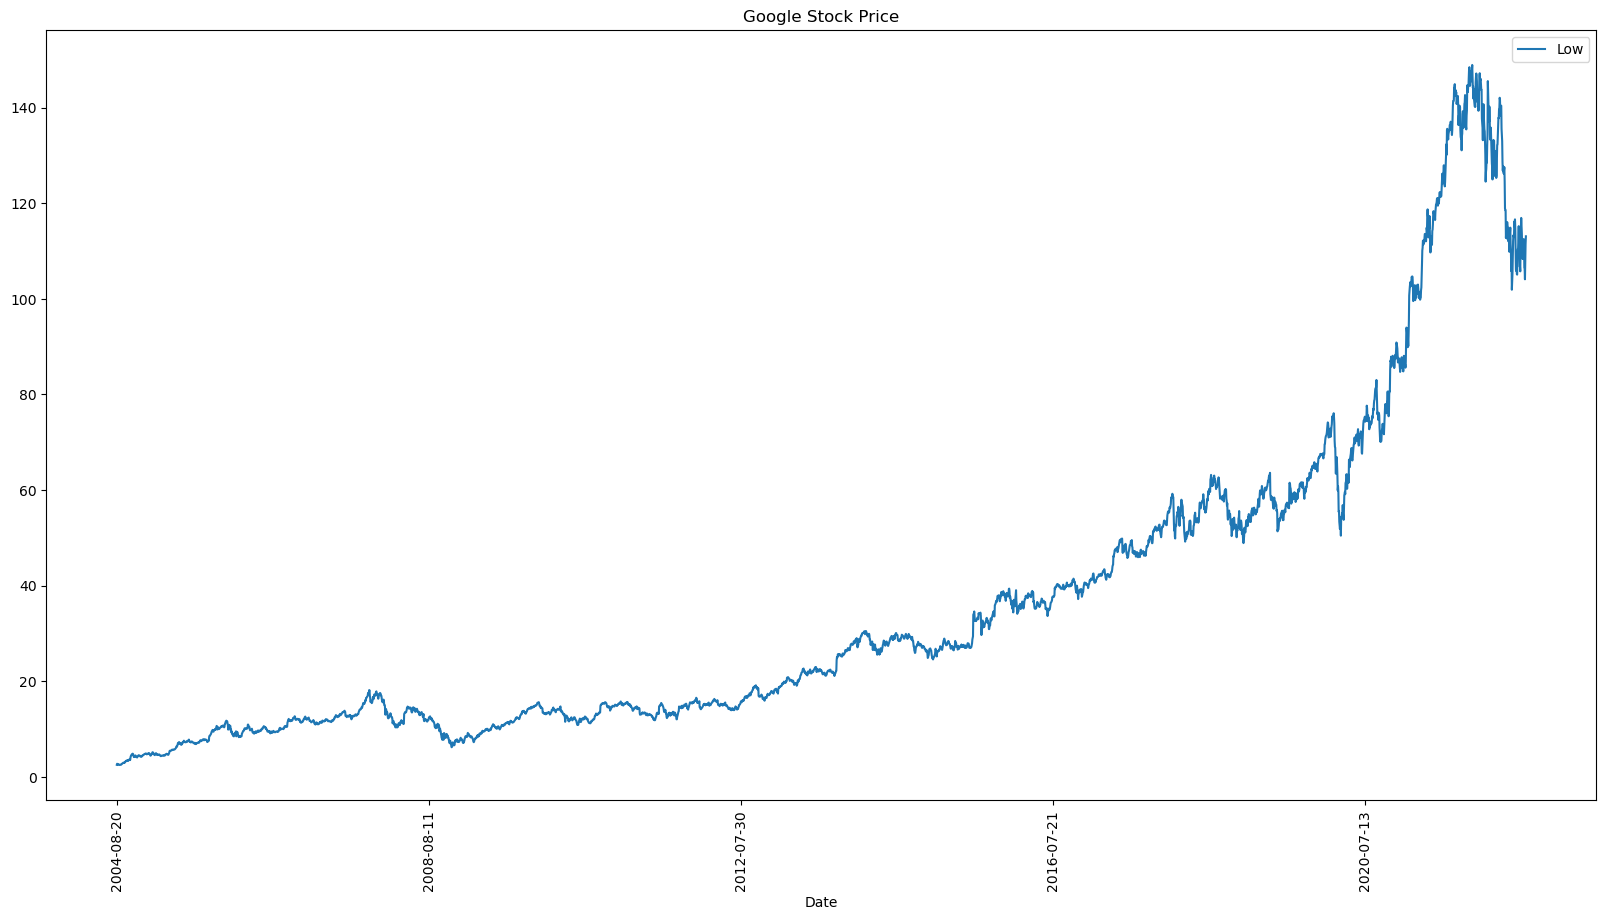

In [6]:
df.plot(x='Date', y='Low', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')

<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

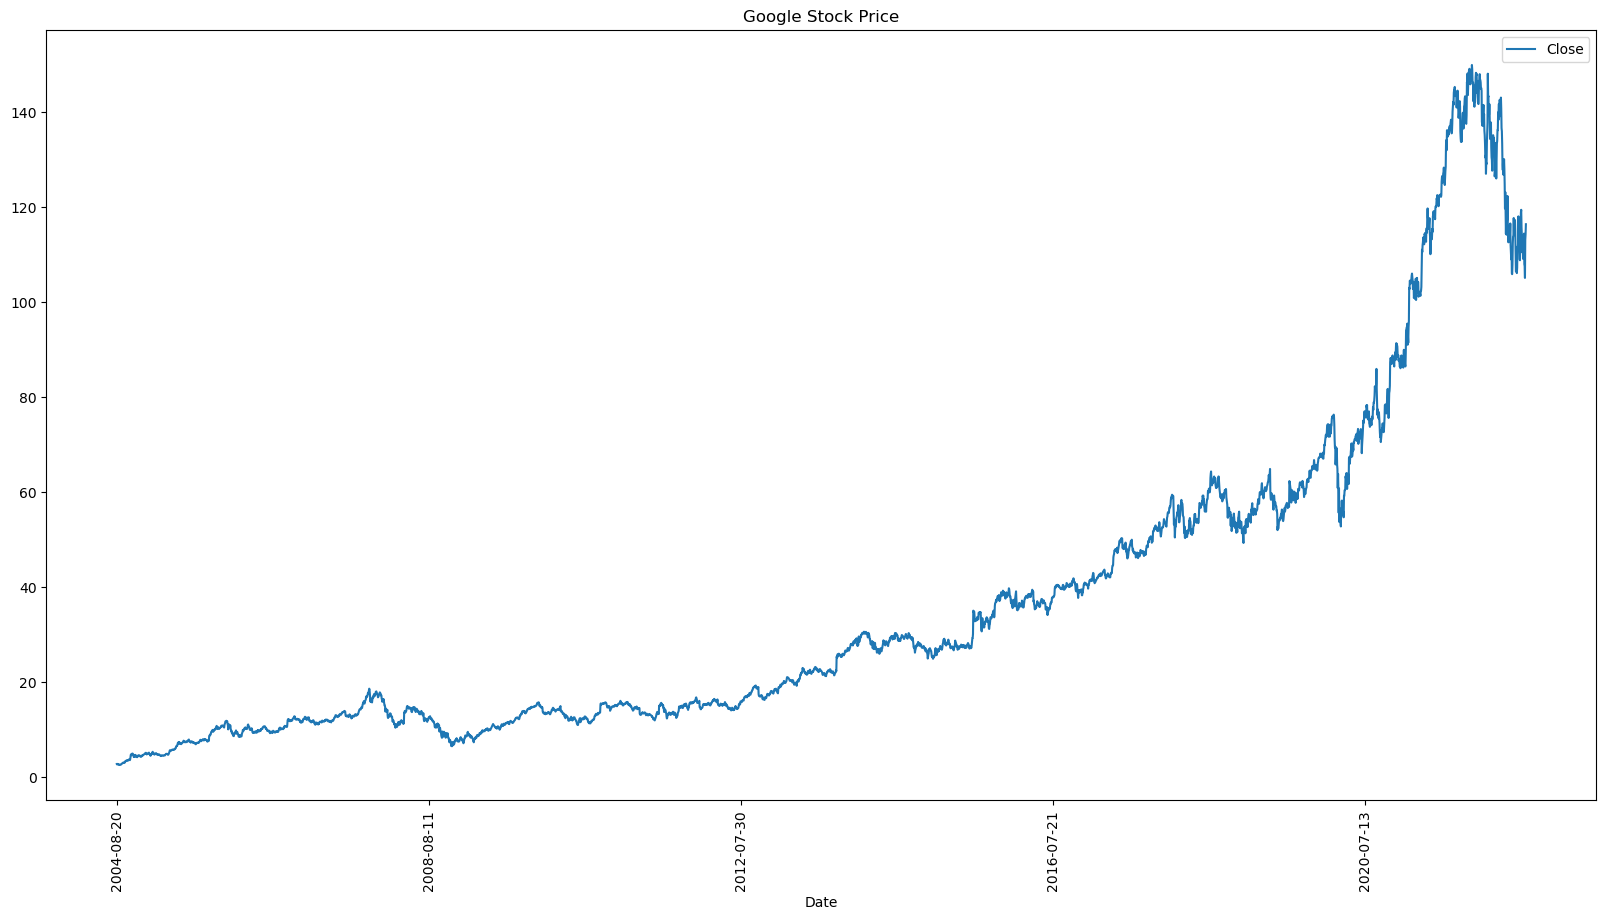

In [7]:
df.plot(x='Date', y='Close', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')

<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

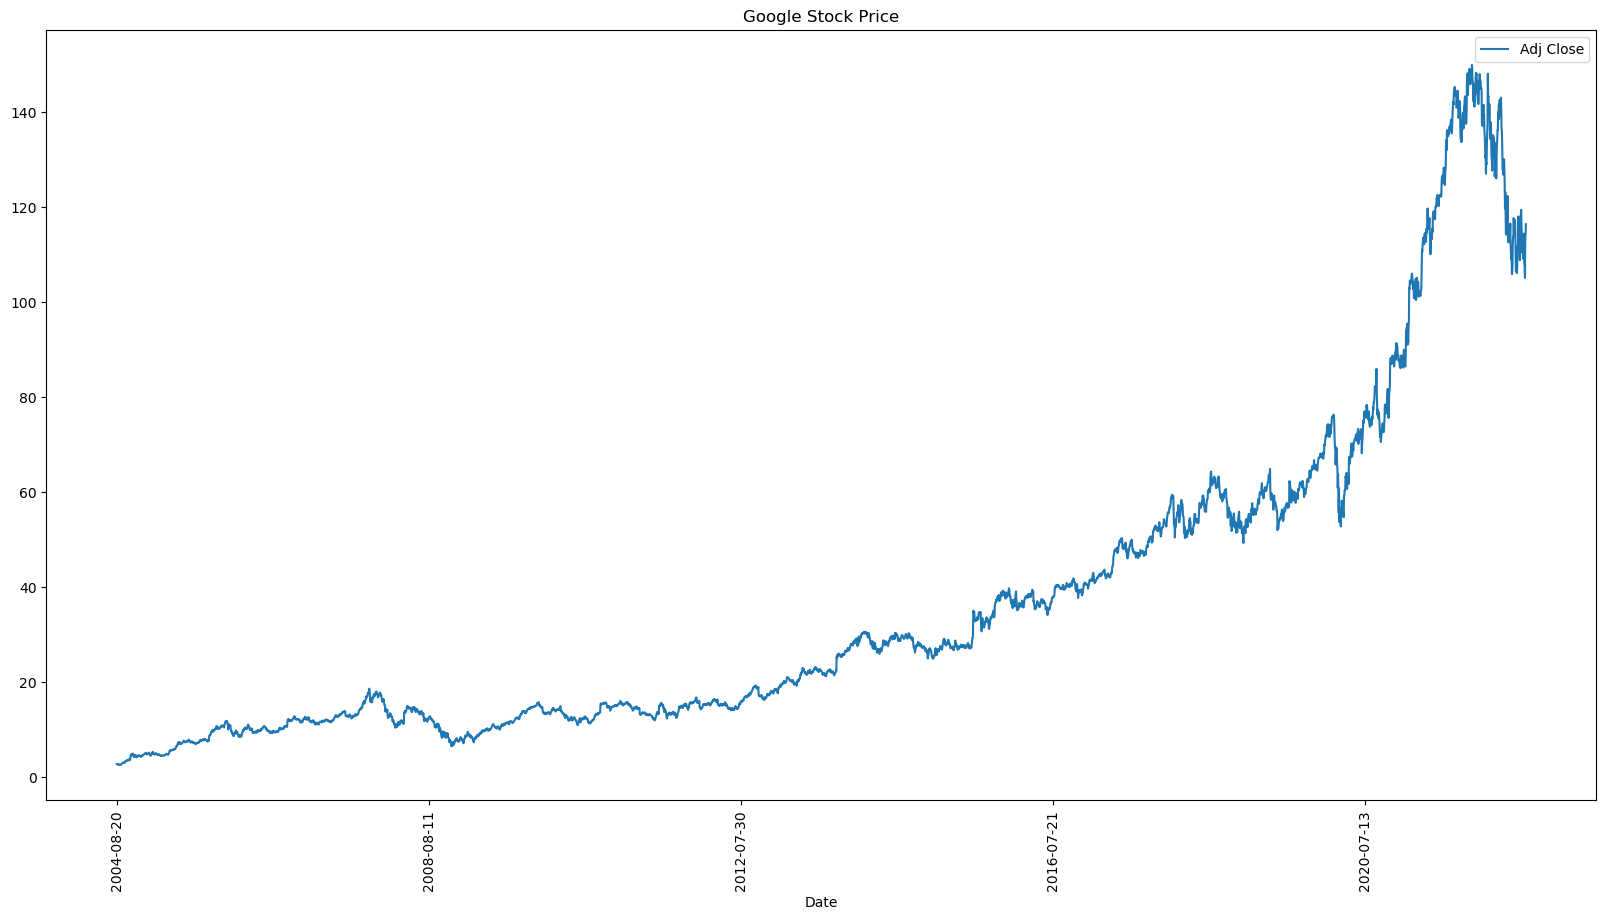

In [11]:
df.plot(x='Date', y='Adj Close', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')


<Axes: title={'center': 'Google Stock Price'}, xlabel='Date'>

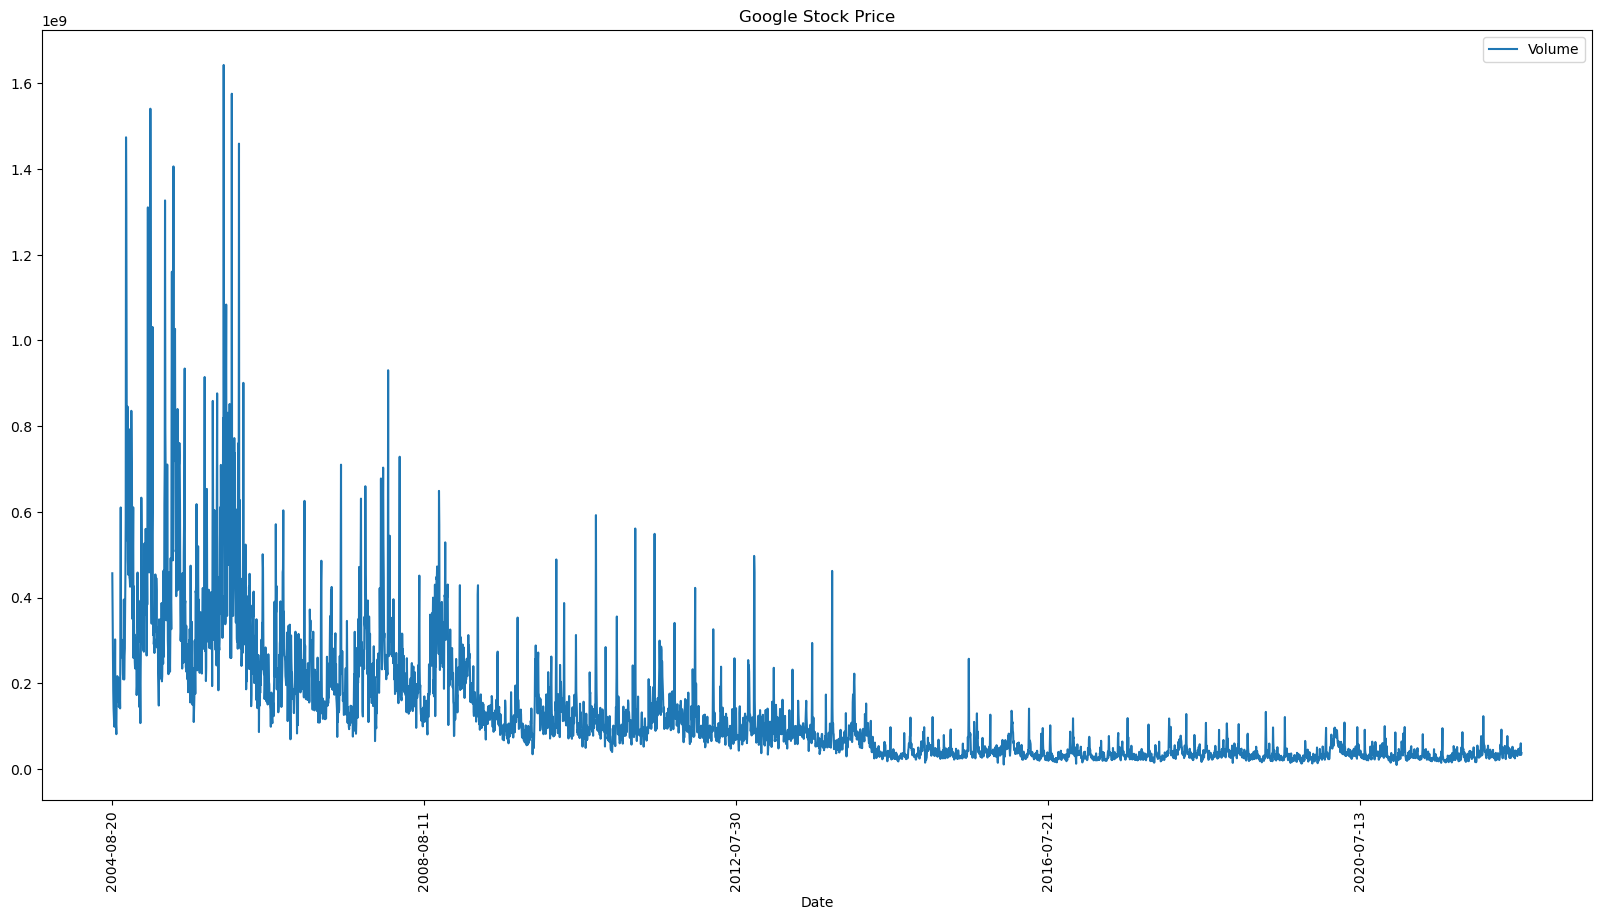

In [9]:
df.plot(x='Date', y='Volume', kind='line', figsize=(20, 10), rot=90, title='Google Stock Price')

In [12]:
data_2020 = df[df['Date'] >= '2020-01-01']
data_2020

,Date,Open,High,Low,Close,Adj Close,Volume
3868,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
3869,2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
3870,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3871,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
3872,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...,...
4512,2022-07-25,108.410004,109.870003,106.300003,107.510002,107.510002,34690900
4513,2022-07-26,106.599998,107.199997,104.070000,105.019997,105.019997,47991000
4514,2022-07-27,109.260002,113.910004,108.010002,113.059998,113.059998,59858500
4515,2022-07-28,112.370003,114.339996,111.459999,114.220001,114.220001,32816600


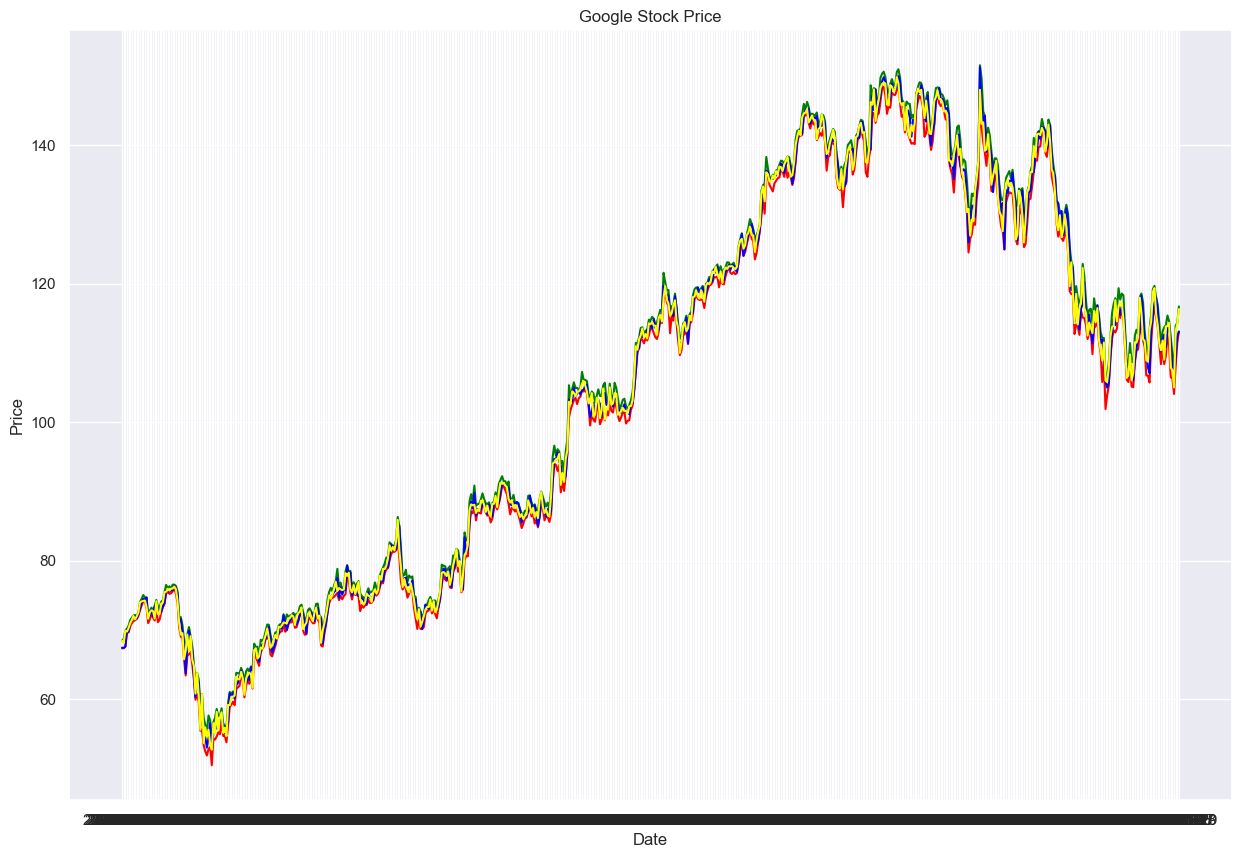

In [16]:
sns.lineplot(x='Date', y='Low', data=data_2020, color='red')
sns.lineplot(x='Date', y='High', data=data_2020, color='green')
sns.lineplot(x='Date', y='Open', data=data_2020, color='blue')
sns.lineplot(x='Date', y='Close', data=data_2020, color='yellow')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Split the data by month to get more accurate results

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Year'] = df['Date'].dt.strftime('%m-%Y')
df['Day'] = df['Date'].dt.strftime('%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month_Year,Day
0,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856,08-2004,20
1,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512,08-2004,23
2,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748,08-2004,24
3,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044,08-2004,25
4,2004-08-26,2.626376,2.701451,2.619119,2.700450,2.700450,141897960,08-2004,26
...,...,...,...,...,...,...,...,...,...
4512,2022-07-25,108.410004,109.870003,106.300003,107.510002,107.510002,34690900,07-2022,25
4513,2022-07-26,106.599998,107.199997,104.070000,105.019997,105.019997,47991000,07-2022,26
4514,2022-07-27,109.260002,113.910004,108.010002,113.059998,113.059998,59858500,07-2022,27
4515,2022-07-28,112.370003,114.339996,111.459999,114.220001,114.220001,32816600,07-2022,28


In [37]:
new_dict = {}
month_year = df['Month_Year'].unique()
for i in month_year:
    new_dict[i] = df[df['Month_Year'] == i]

In [84]:
linear = make_pipeline(PolynomialFeatures(2), LinearRegression() )

for i,j in new_dict.items():
    X = j['Day'].to_numpy().reshape(-1,1)
    y = j['Close'].to_numpy().reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linear.fit(X_train, y_train)
    predictions = linear.predict(X_test)
    mean_squared_error(y_test, predictions)
    print(i, mean_squared_error(y_test, predictions))

date = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31]]
now = linear.predict(date)
print(now)

08-2004 0.0019988488866706762
09-2004 0.013004472539645748
10-2004 0.06426557096363088
11-2004 0.0430044737186378
12-2004 0.011300858577100292
01-2005 0.05650834843550186
02-2005 0.04121161781625583
03-2005 0.006199071042793968
04-2005 0.07559457809429165
05-2005 0.01448425636987501
06-2005 0.0013099162726271213
07-2005 0.07152792218838509
08-2005 0.023780854109383003
09-2005 0.007342783415392013
10-2005 0.05831148067448215
11-2005 0.06230095611837444
12-2005 0.1982749973221617
01-2006 0.3586929882093803
02-2006 0.04335166027299046
03-2006 0.12041747299877748
04-2006 0.05648283532657198
05-2006 0.022421994748306664
06-2006 0.015348810700357356
07-2006 0.040373480815962925
08-2006 0.03933286748002437
09-2006 0.14184333756668988
10-2006 0.13618005094027102
11-2006 0.07959822339795744
12-2006 0.07927213408366321
01-2007 0.08870852463398265
02-2007 0.15300111302495256
03-2007 0.05649221635523398
04-2007 0.018432420304643864
05-2007 0.022474935152188215
06-2007 0.13557771826796086
07-2007 0

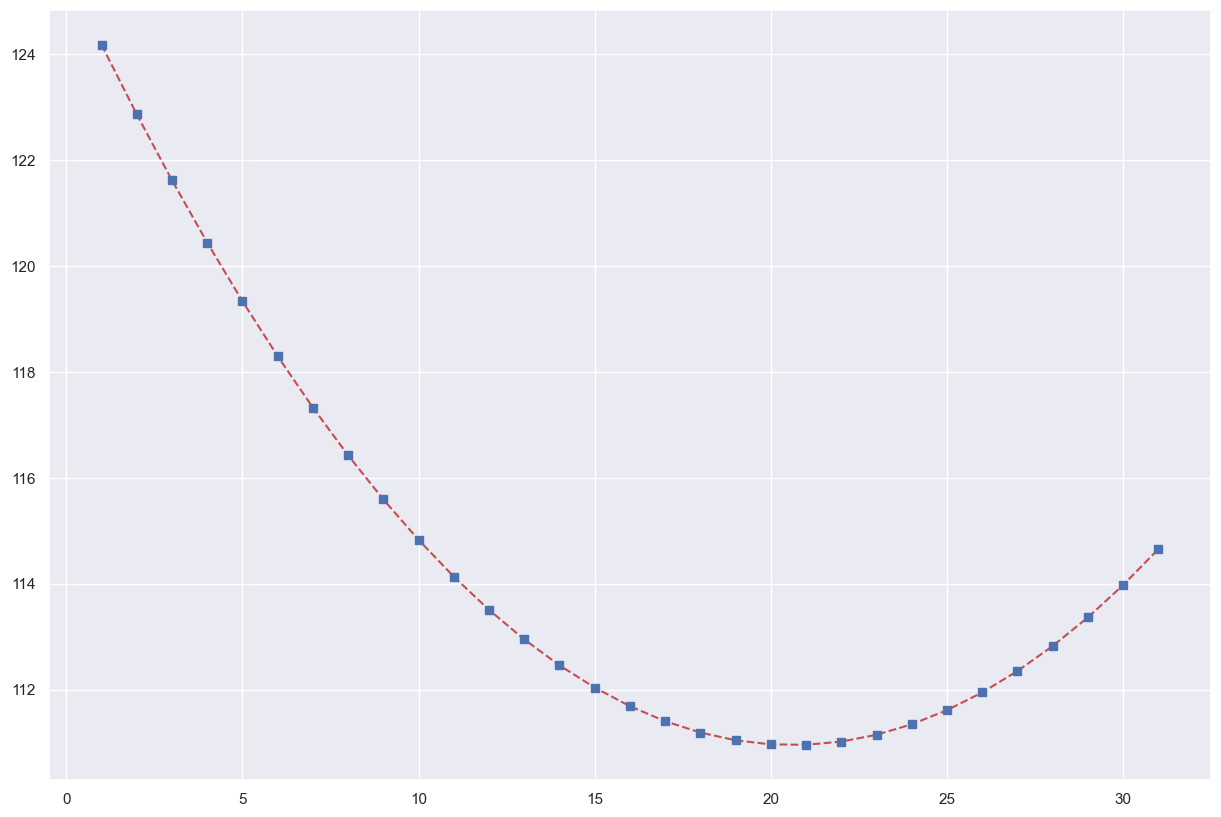

In [85]:
plt.plot(date, now, 'r--', date, now, 'bs')

In [77]:
new_linear = make_pipeline(PolynomialFeatures(2), LinearRegression())

X = df['Day'].to_numpy().reshape(-1, 1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
new_linear.fit(X_train, y_train)

now = [[1],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31]]

predictions = new_linear.predict(X_test)
mean_squared_error(y_test, predictions)

1137.2778991606758

ValueError: Per-column arrays must each be 1-dimensional

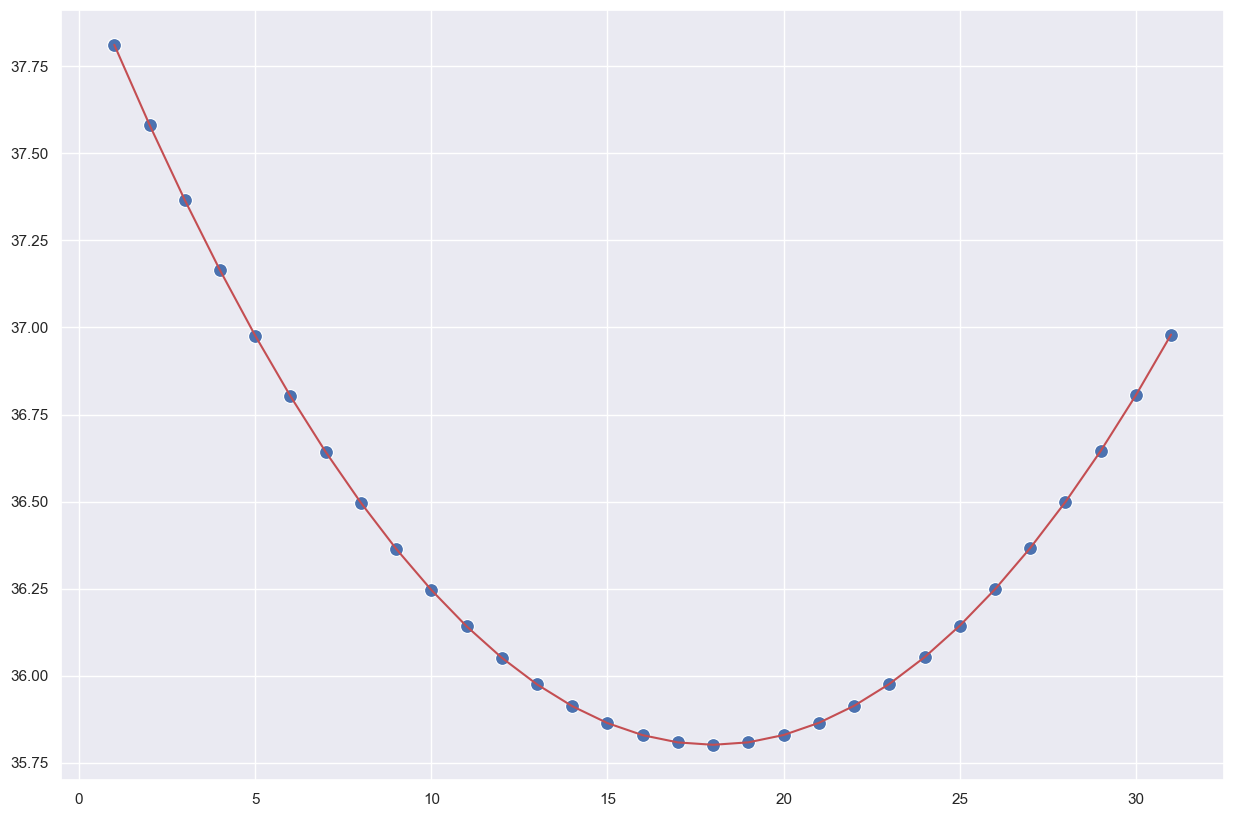

In [78]:
nows = new_linear.predict(now)
plt.plot(now, nows, 'r-')
month_day = [1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
sns.scatterplot(x=month_day, y=nows, color='b', s=100)
sns.scatterplot(x=month_day, y=X_test, color='r', s=100)